# step 1 - 인물사진 만들기

### 1. 인물사진 가져오기

In [142]:
# os: Operating System의 줄임말로, 운영체제에서 제공되는 여러 기능을 파이썬에서 사용할 수 있도록 함 (Ex. 디렉토리 경로 이동, 시스템 환경 변수 가져오기 등)
# urllib: URL 작업을 위한 여러 모듈을 모은 패키지. (Ex. urllib.request, urllib.parse, ...)
# cv2: OpenCV 라이브러리로, 실시간 컴퓨터 비전을 목적으로 한 프로그래밍 라이브러리
# numpy(NumPy): 행렬이나 대규모 다차원 배열을 쉽게 처리할 수 있도록 지원하는 라이브러리. 데이터 구조 외에도 수치 계산을 위해 효율적으로 구현된 기능을 제공
# pixellib: 이미지 및 비디오 segmentation을 수행하기 위한 라이브러리. 
# pixellib.semantic: segmentation 기법 중, semantic segmentation을 쉽게 사용할 수 있도록 만든 라이브러리
# matplotlib: 파이썬 프로그래밍 언어 및 수학적 확장 NumPy 라이브러리를 활용한 플로팅 라이브러리로, 데이터 시각화 도구
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

In [143]:
# os 모듈에 있는 getenv() 함수를 이용하여 읽고싶은 파일의 경로를 file_path에 저장
# 준비한 이미지 파일의 경로를 이용하여, 이미지 파일을 읽음
# cv2.imread(경로): 경로에 해당하는 이미지 파일을 읽어서 변수에 저장
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/image1.png'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)

(1024, 768, 3)


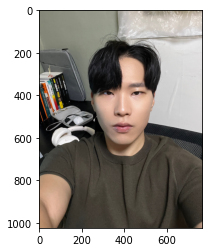

In [144]:
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 이미지 색상 채널을 변경 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

### 2. DeepLab 모델을 준비하기

In [145]:
# 1. os.getenv(x)함수는 환경 변수x의 값을 포함하는 문자열 변수를 반환
# 2. #os.path.join(a, b)는 경로를 병합하여 새 경로 생성 
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file) # urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 다운로드 해서 model_file 파일명으로 저장

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7ca44a22a6d0>)

In [146]:
#ixelLib로 우리가 사용할 세그멘테이션 모델을 생성
#PixelLib 라이브러리 에서 가져온 클래스로 semantic segmentation 수행 클래스 인스턴스 생성
model = semantic_segmentation() 
# pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출
model.load_pascalvoc_model(model_file) 

### 3. image segmentation

In [147]:
#모델에 이미지를 입력
#segmentAsPascalvoc() 입력된 이미지를 분할,분할 출력의 배열을 가져옴
#분할 은 pacalvoc 데이터로 학습된 모델을 이용
segvalues, output = model.segmentAsPascalvoc(img_path) 
#segvalues  
#key : 세그먼트 클래스의 이름 ('person','car','background'등), valuse : 픽셀값 
#output (분할 결과 이미지)  NumPy 배열 (ndarray)

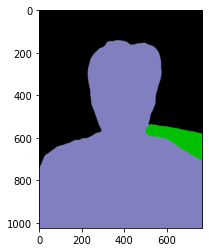

In [148]:
#모델에서 나온 출력값확인
#segmentAsPascalvoc() 함수 를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 output을 matplotlib을 이용해 출력
plt.imshow(output)
plt.show()

In [149]:
segvalues # segmentAsPascalvoc() 함수를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 배열값을 출력

{'class_ids': array([ 0, 15, 18]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]])}

In [150]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]

#segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
person
sofa


In [151]:
# 물체마다 output에 어떤 색상으로 나타나 있는지만 알아내기
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생상 코드 결과물이예요!
#컬러맵 만들기 
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [152]:
#그럼 사람을 나타내는 15번째 색상
colormap[15] #컬러맵 15에 해당하는 배열 출력 (pacalvoc에 LABEL_NAMES 15번째인 사람)

array([192, 128, 128])

In [153]:
seg_color = (128,128,192) # 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있어서

(1024, 768)


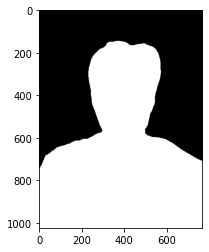

In [154]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
# seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

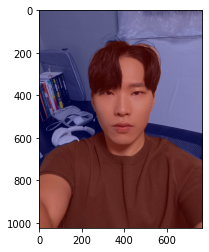

In [155]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

### 4.배경 흐리게하기

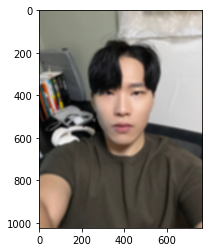

In [156]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (13,13))

# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)   
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

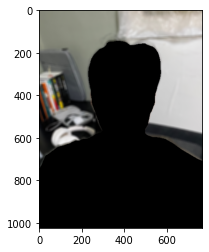

In [157]:
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
# 연산을 하고 나면 배경은 255 사람은 0입니다.
img_bg_mask = cv2.bitwise_not(img_mask_color)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

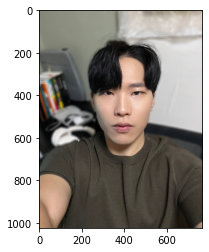

In [158]:
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
# 아닌 영역은 블러된 이미지 값을 사용합니다.
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

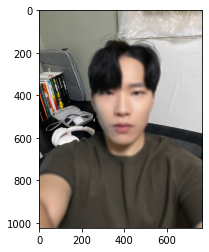

In [159]:
#사람 부분을 블러로, 배경 부분을 원본으로 출력
img_concat = np.where(img_mask_color==255, img_orig_blur, img_orig )
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

### 5.사진에서 문제점 찾기

![사진](output_image-2.png)

- 좌측 어깨 부분이 blur 처리가 이상하게 됨
- 오른쪽 어깨 옷 부분도 blur처리가 됨

# step-2 여러 사람이 있는 사진 blur처리 해보기

![사진](travel.png)
- 여러 사람이 있는 사진을 가져와서 인물사진을 만들어 보기 

### 1. 사진 가져오기

In [160]:
# os 모듈에 있는 getenv() 함수를 이용하여 읽고싶은 파일의 경로를 file_path에 저장
# 준비한 이미지 파일의 경로를 이용하여, 이미지 파일을 읽음
# cv2.imread(경로): 경로에 해당하는 이미지 파일을 읽어서 변수에 저장
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/travel.png'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)

(1736, 3088, 3)


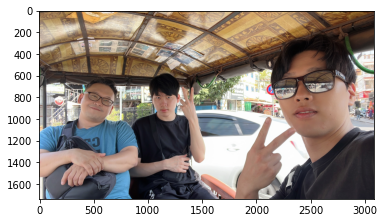

In [161]:
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 이미지 색상 채널을 변경 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

(868, 1544, 3)


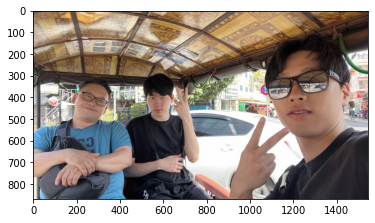

In [162]:
#이미지 pixel값이 너무 크므로 연산량을 줄이기 위해 해상도를 줄임
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/travel.png'  
img_orig = cv2.imread(img_path) 

#이미지 해상도 변경
ds_img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/dw_travel.png' 
downsampled_img = cv2.pyrDown(img_orig)  # 해상도 절반으로 줄이기
cv2.imwrite(ds_img_path, downsampled_img)  # 변경된 이미지 저장

#해상도가 변경된 이미지 가져오기
img_orig = cv2.imread(ds_img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

### 2.  image segmentation

In [163]:
#모델에 이미지를 입력
#segmentAsPascalvoc() 입력된 이미지를 분할,분할 출력의 배열을 가져옴
#분할 은 pacalvoc 데이터로 학습된 모델을 이용
segvalues, output = model.segmentAsPascalvoc(ds_img_path) 
#segvalues  
#key : 세그먼트 클래스의 이름 ('person','car','background'등), valuse : 픽셀값 
#output (분할 결과 이미지)  NumPy 배열 (ndarray)

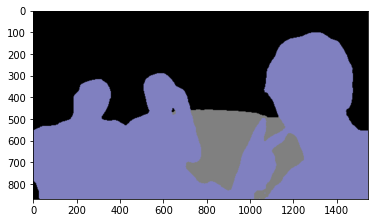

In [164]:
#모델에서 나온 출력값확인
#segmentAsPascalvoc() 함수 를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 output을 matplotlib을 이용해 출력
plt.imshow(output)
plt.show()

In [165]:
segvalues # segmentAsPascalvoc() 함수를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 배열값을 출력

{'class_ids': array([ 0,  7, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]])}

In [166]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
car
person


In [167]:
#그럼 사람을 나타내는 15번째 색상
colormap[15] #컬러맵 15에 해당하는 배열 출력 (pacalvoc에 LABEL_NAMES 15번째인 사람)

array([192, 128, 128])

In [168]:
seg_color = (128,128,192) # 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있어서

(868, 1544)


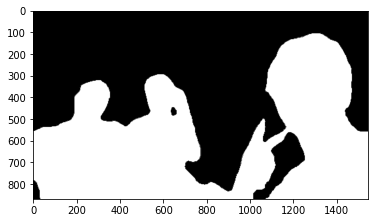

In [169]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
# seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

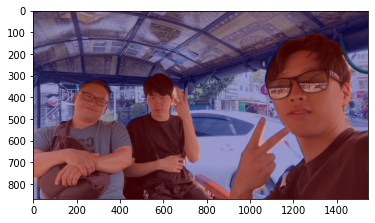

In [170]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show = img_orig.copy()
# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255
# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

### 3. blur 처리

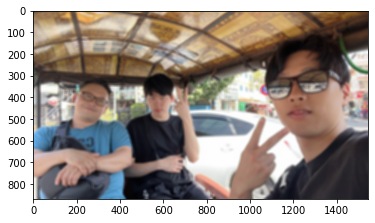

In [171]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (13,13))

# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)   
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

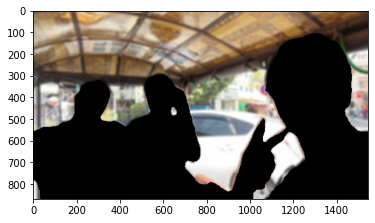

In [172]:
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
# 연산을 하고 나면 배경은 255 사람은 0입니다.
img_bg_mask = cv2.bitwise_not(img_mask_color)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

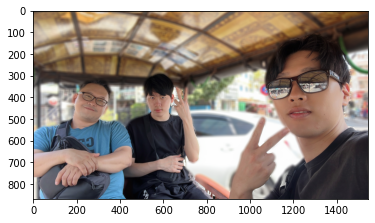

In [173]:
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
# 아닌 영역은 블러된 이미지 값을 사용합니다.
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

### 4. 사진에서 문제점 찾기

![사진](output_image.png)
- 복잡한 사진일수록 blur처리가 제대로 안되는 빈도가 잦아짐

### 5. 배경전한 크로마키사진 제작하기

(1080, 1920, 3)


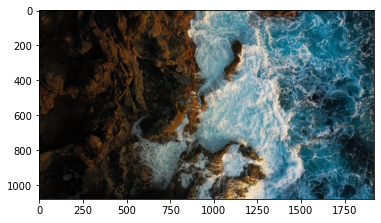

In [174]:
### 배경전환할 사진 가져오기
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/ocean.png'  
img_background = cv2.imread(img_path)

print(img_background.shape)
plt.imshow(cv2.cvtColor(img_background, cv2.COLOR_BGR2RGB))
plt.show()

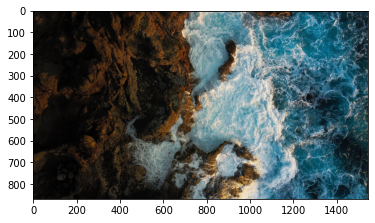

In [175]:
### 크로마키 사진의 shape을 기존 사진과 동일하게 설정하기
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/ocean.png'  
img_background = cv2.imread(img_path)

# 픽셀 값 걸정
back_height = img_orig.shape[0]
bach_width = img_orig.shape[1]

#이미지 크기 조절
resized_img = cv2.resize(img_background, (bach_width, back_height))

img_background = resized_img
plt.imshow(cv2.cvtColor(img_background, cv2.COLOR_BGR2RGB))
plt.show()


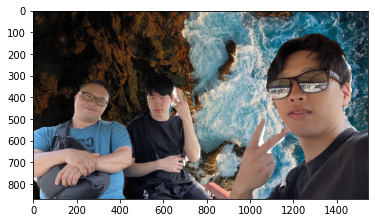

In [176]:
#세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 아닌부분을 크로마키
img_concat = np.where(img_mask_color==255, img_orig, img_background)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

# step-3 동물사진 blur 처리 하기

### 1. 사진 가져오기

(1125, 1500, 3)


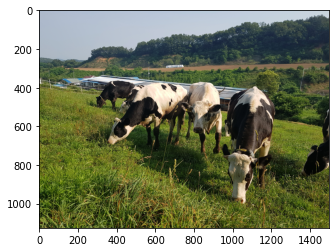

In [177]:
# os 모듈에 있는 getenv() 함수를 이용하여 읽고싶은 파일의 경로를 file_path에 저장
# 준비한 이미지 파일의 경로를 이용하여, 이미지 파일을 읽음
# cv2.imread(경로): 경로에 해당하는 이미지 파일을 읽어서 변수에 저장
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/cows.png'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

### 2. image segmentation

In [178]:
#모델에 이미지를 입력
#segmentAsPascalvoc() 입력된 이미지를 분할,분할 출력의 배열을 가져옴
#분할 은 pacalvoc 데이터로 학습된 모델을 이용
segvalues, output = model.segmentAsPascalvoc(img_path) 

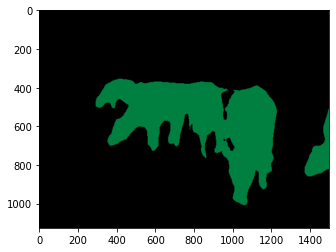

In [179]:
#모델에서 나온 출력값확인
#segmentAsPascalvoc() 함수 를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 output을 matplotlib을 이용해 출력
plt.imshow(output)
plt.show()

In [180]:
segvalues #이미지를 분할한 뒤 나온 결과

{'class_ids': array([ 0, 10]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [181]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
cow


In [182]:
#그럼 소를 나타내는 10번째 색상
colormap[10]

array([ 64, 128,   0])

In [183]:
seg_color = (0,128,64) # 색상순서 변경

(1125, 1500)


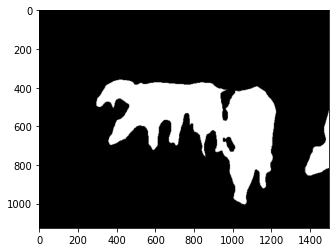

In [184]:
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

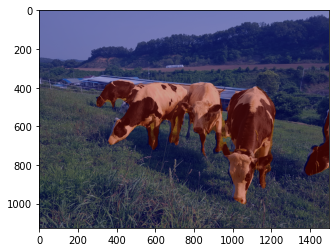

In [185]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show = img_orig.copy()
# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255
# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

### 3. blur 처리

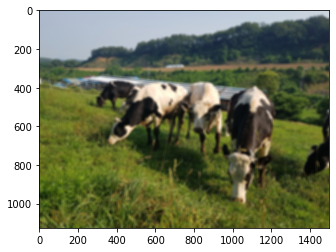

In [186]:
#blurring kernel size를 뜻합니다
img_orig_blur = cv2.blur(img_orig, (15,15))

# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)   
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

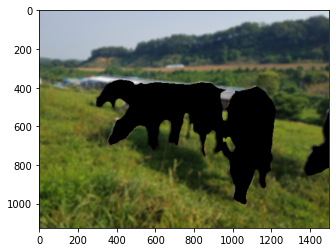

In [187]:
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not()
# 연산을 하고 나면 배경은 255 소는 0입니다.
img_bg_mask = cv2.bitwise_not(img_mask_color)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

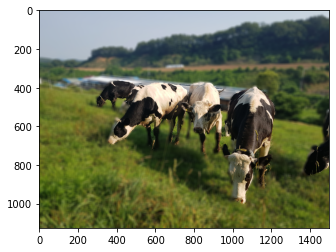

In [188]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)

plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

### 4. 사진에서 문제점 찾기

In [189]:
#사진 가져오기
cv2.imwrite('blur_cow.png', img_concat)  # 이미지 저장

True

![소이미지](blur_cow_img.png)

- 복잡한 여러마리의 소를 인식하는 과정에서 많은 문제점이 발견됨
- 소 다리같은 디테일한 부분에 대한 blur 처리가 미흡함
- 소의 얼굴만 있는 부분은 대부분 blur처리가 되었음(인식이 잘 안된듯함)

### 5. 배경전환 크로마키 사진 제작하기

(3264, 5824, 3)


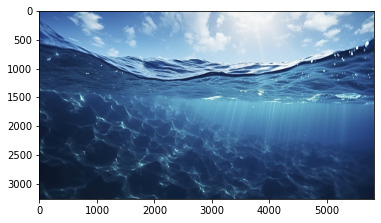

In [190]:
### 배경전환할 사진 가져오기
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/wave.png'  
img_background = cv2.imread(img_path)

print(img_background.shape)
plt.imshow(cv2.cvtColor(img_background, cv2.COLOR_BGR2RGB))
plt.show()

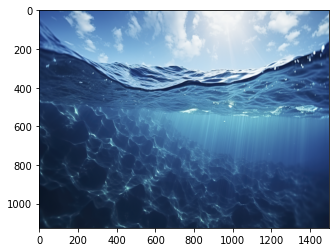

In [191]:
### 크로마키 사진의 shape을 기존 사진과 동일하게 설정하기
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/wave.png'  
img_background = cv2.imread(img_path)

# 픽셀 값 걸정
back_height = img_orig.shape[0]
bach_width = img_orig.shape[1]

#이미지 크기 조절
resized_img = cv2.resize(img_background, (bach_width, back_height))

img_background = resized_img
plt.imshow(cv2.cvtColor(img_background, cv2.COLOR_BGR2RGB))
plt.show()

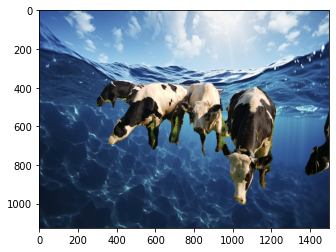

In [192]:
#세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 아닌부분을 크로마키
img_concat = np.where(img_mask_color==255, img_orig, img_background)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

# step-4 인물모드 사진의 문제점을 개선할 수 있는 솔루션

### 1. DeepLab 모델의 Semantic Segmentation 문제점

**1. 섬세한 경계를 표현하는데 문제가 있음**
- 대체적으로 객체 인식은 잘 되지만 소의 다리, 삐져나온 옷 등 디테일한 부분에서 객체 인식이 잘 안됨
- atrous convolution을 사용하여 객체를 인식하는 성능이 좋으나 디테일이 부족함

**2. 사진을 학습하고 객체탐지 하는데 시간이 많이 소요됨**
- 실시간 처리나 고해상도 사진의 경우 시간이 더 많이 소요됨

### 2. 해결 방법 

**2-1)픽셀마다 피사계 심도를 조절해보자** 


**문제점**  
- atrous convolution의 사용으로 넓은 범위의 맥락 정보를 활용하여 객체인식은 잘 되지만, 섬세한 경계에서의 문제가 있었음

**초안**
1. 경험상 카메라가 초점을 잡을때 객체를 제외한 모든 부분이 blur처리 되는 것은 아니였음 
2. Semantic Segmentation의 경우 객체인식이 잘 되므로 객체와 가깝거나 먼 부분의 경우, 픽셀마다 피사계 심도를 조절한다면 객체에서 먼 거리나 가까운 거리를 각가 따로 피사계 심도를 조절할 수 있지 않을까 라는 고민을 하게 됨 

**해결방안**

Mono Depth Estimation 
- 하나의 Image만을 가지고 Depth를 추정하는 작업

![](depth.png)
- Left image, right image 의 같은 지점을 찍었을때의 차이 구함
- 멀리있을 경우 차이가 큼, 가까운 경우 작음

두개의 사진이 필요한거 아니야?
- Mono Depth를 추정하기 위해 Left image를 통해서 2개의 Disparity를 뽑아낼 수 있다고 함

**work flow**
1. 사진 촬영
2. Mono Depth Estimation를 활용해 image의 시차정보 계산하여 Depth계산
3. Semantic Segmentation 모델에 입력
4. 모델결과를 바탕으로 객체를 나타내는 mask생성
5. mask 정보와 depth 값을 결합
6. 인물과 배경 분리
7. depth에 따라 차등으로 blur효과적용
8. 이미지출력


## 회고

**배운점**
- atrous convolution의 연산방법, 장단점 등을 알게 되었다
- DeepLab 모델의 객체탐지 성능은 좋으나 디테일한 경계표현에는 문제가 있음을 알게 되었다
- Mono Depth Estimation개념에 대해서 알게 되었음
- Unet, HRnet 등에 대해서도 알게 되었다
- 솔루션을 고민해보며 Depth Estimation을 알게 되었다

**아쉬운 점**
- 딱히 없다

**느낀 점**
- 평소 핸드폰으로 사용했던 음식사진, 인물사진의 원리를 알게된 것 같아 신기했다.
- 핸드폰 인물모드는 머리카락 한올까지 초점이 잘 맞춰지는데 원리가 궁금했다.
- 실시간으로 초점을 맞추는 원리가 궁금했다

**어려웠던 점**
- 사진의 문제점을 개선할 솔루션을 고민하는 부분이 어려웠다.